In [1]:
import numpy as np
import sklearn
import matplotlib
import cvxpy as cp
import torch
import torch.nn as nn
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

np.random.seed(632)


/Users/markviti/opt/anaconda3/envs/data/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Problem 1
### A

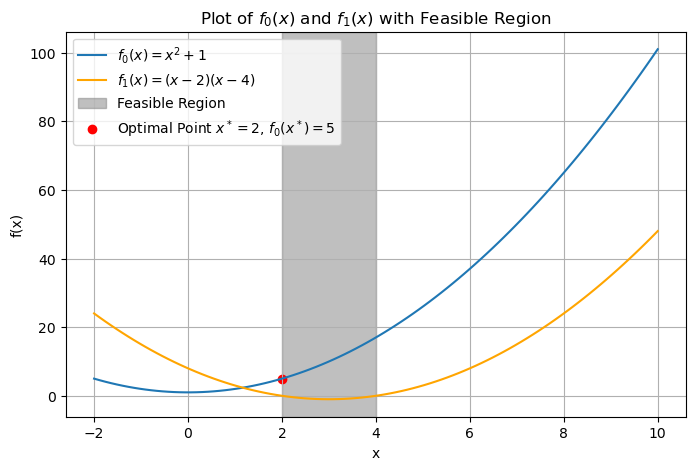

In [2]:
def f0(x):
    return x**2 + 1
def f1(x):
    return (x - 2)*(x - 4)

x = np.linspace(-2, 10, 100)
y0 = f0(x)
y1 = f1(x)

feasible_x = x[(x >= 2) & (x <= 4)]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, y0, label='$f_0(x) = x^2 + 1$')
plt.plot(x, y1, label='$f_1(x) = (x-2)(x-4)$', color='orange')

# Highlight the region between 2 and 4
plt.axvspan(2, 4, color='grey', alpha=0.5, label='Feasible Region')

# Plot optimal point x = 2
plt.scatter(2, f0(2), color='red', label=f"Optimal Point $x^* = 2$, $f_0(x^*) = {f0(2)}$")

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of $f_0(x)$ and $f_1(x)$ with Feasible Region')
plt.legend()
plt.grid(True)
plt.show()

### B
We will first write out the Lagrange dual. The Lagrange dual is given by
$\begin{align}
L(x, \lambda) & = (1 + \lambda)x^2 - 6\lambda x + (1 + 8 \lambda)
\end{align}$

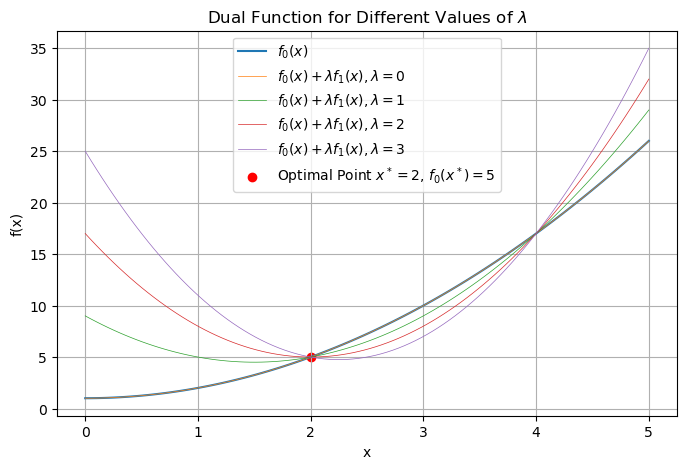

In [3]:
# Plot the dual for a few values of lambda
x = np.linspace(0, 5, 100)
lambdas = [0, 1, 2, 3]
plt.figure(figsize=(8, 5))
plt.plot(x, f0(x), label='$f_0(x)$')
for l in lambdas:
    plt.plot(x, f0(x) + l*f1(x), label=f"$f_0(x) + λ f_1(x), λ = {l}$", linewidth=.5)
plt.xlabel('x')
plt.ylabel('f(x)')

# plot the optimal point
plt.scatter(2, f0(2), color='red', label=f"Optimal Point $x^* = 2$, $f_0(x^*) = {f0(2)}$")
plt.title('Dual Function for Different Values of $\lambda$')
plt.legend()
plt.grid(True)
plt.show()

Notice first the minimum of $L(x, \lambda)$ with respect to $x$ is always less than $p^*$ as the coefficient of $x^2$ is always positive. Notice that the maximum minimum of $L(x, \lambda)$ occurs at $\lambda = 2$. Therefore, we have that $p^* = g(\lambda)$ for $\lambda = 2$.

Notice moreover that whenever $\lambda \leq -1$ then the function is unbounded below. Therefore, we will consider the cases where $\lambda$ is above and below $-1$ separately. When $\lambda > -1$, we have that the minimum of $L(x, \lambda)$ is given by
$\begin{align}
g(\lambda) & = \min_{x} L(x, \lambda) \\
& = \min_{x} (1 + \lambda)x^2 - 6\lambda x + (1 + 8 \lambda) \\
\end{align}$
Taking the derivative with respect to $x$ and setting it equal to zero, we have that
$\begin{align}
\frac{dL(x, \lambda)}{dx} & = 2(1 + \lambda)x - 6\lambda = 0 \\
\end{align}$
Solving for $x$, we have that
$\begin{align}
x & = \frac{3\lambda}{1 + \lambda}
\end{align}$
Plugging this into $L(x, \lambda)$, we have that
$\begin{align}
g(\lambda) & = (1 + \lambda)\left(\frac{3\lambda}{1 + \lambda}\right)^2 - 6\lambda\left(\frac{3\lambda}{1 + \lambda}\right) + (1 + 8 \lambda) \\
& = \frac{9\lambda^2}{(1 + \lambda)} - \frac{18\lambda^2}{(1 + \lambda)} + (1 + 8 \lambda) \\
& = \frac{-9\lambda^2}{(1 + \lambda)} + (1 + 8 \lambda) \\
\end{align}$

When $\lambda \leq -1$, we have that the minimum of $L(x, \lambda)$ is given by $-\infty$. Therefore, our function will be given by 
$\begin{align}
g(\lambda) & = \begin{cases}
\frac{-9\lambda^2}{(1 + \lambda)} + (1 + 8 \lambda) & \text{if } \lambda > -1 \\
-\infty & \text{if } \lambda \leq -1
\end{cases}
\end{align}$
We will plot that function below.

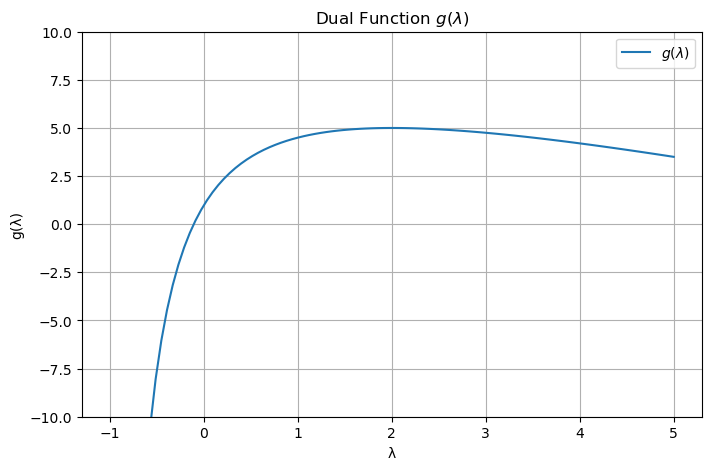

In [4]:
# plot the dual function in lambda
def dual_function(lam):
    return (-9*(lam**2)) / (1 + lam) + (1 + 8 * lam)

lambdas = np.linspace(-0.99999, 5, 100)
plt.figure(figsize=(8, 5))
plt.plot(lambdas, dual_function(lambdas), label='$g(λ)$')
plt.xlabel('λ')
plt.ylabel('g(λ)')
plt.title('Dual Function $g(λ)$')
plt.ylim(-10, 10)
plt.legend()
plt.grid(True)
plt.show()

To show that the function is concave, we will take the second derivative of $L(x, \lambda)$ with respect to $x$. We have that
$\begin{align}
\frac{d^2L(x, \lambda)}{dx^2} & = 2(1 + \lambda)
\end{align}$
As $2(1 + \lambda) > 0$, we have that the function is concave. Therefore, we have that $g(\lambda)$ is concave.

To find the maximum of $g(\lambda)$, we will take the derivative of $g(\lambda)$ with respect to $\lambda$. We have that
$\begin{align}
\frac{dg(\lambda)}{d\lambda} & = \frac{-18\lambda(1 + \lambda) - 9\lambda^2}{(1 + \lambda)^2} + 8 \\
& = \frac{-18\lambda - 18\lambda^2 - 9\lambda^2 + 8(1 + \lambda)^2}{(1 + \lambda)^2} \\
& = \frac{-18\lambda - 18\lambda^2 - 9\lambda^2 + 8 + 16\lambda + 8\lambda^2}{(1 + \lambda)^2} \\
& = \frac{-18\lambda - 18\lambda^2 - 9\lambda^2 + 8 + 16\lambda + 8\lambda^2}{(1 + \lambda)^2} \\
& = \frac{-2\lambda - \lambda^2 + 8}{(1 + \lambda)^2} \\
\end{align}$
Setting this equal to zero, we have that
$\begin{align}
0 & = -2\lambda - \lambda^2 + 8 \\
\end{align}$
Solving for $\lambda$, we have that
$\begin{align}
0 & = -2\lambda - \lambda^2 + 8 \\
\lambda^2 + 2\lambda - 8 & = 0 \\
& = (\lambda + 4)(\lambda - 2) \\
\end{align}$
Therefore, we have that the maximum of $g(\lambda)$ occurs at $\lambda = 2$. Therefore, we have that the maximum of $g(\lambda)$ is given by
$\begin{align}
g(2) & = \frac{-9(2)^2}{(1 + 2)} + (1 + 8 \cdot 2) \\
& = \frac{-9(4)}{3} + (1 + 16) \\
& = -12 + 17 \\
& = 5
\end{align}$
Therefore, we have that the maximum of $g(\lambda)$ is given by $5$ and occurs at $\lambda = 2$.

### C
We will well characterize the dual problem. Clearly, the dual problem is 
$\begin{align}
\text{maximize } \:\:\: & \:\:\: \frac{-9\lambda^2}{1 + \lambda} + 8\lambda + 1 \\
\text{subject to } & \:\:\: \lambda \geq 0
\end{align}$
We have already shown concavity of the function, but we will show it again. To show that the function is concave, we will take the second derivative of $L(x, \lambda)$ with respect to $x$. We have that
$\begin{align}
\frac{d^2L(x, \lambda)}{dx^2} & = 2(1 + \lambda)
\end{align}$
As $2(1 + \lambda) > 0$, we have that the function is concave. Therefore, we have that $g(\lambda)$ is concave.

To find the maximum of $g(\lambda)$, we will take the derivative of $g(\lambda)$ with respect to $\lambda$. We have that
$\begin{align}
\frac{dg(\lambda)}{d\lambda} & = \frac{-18\lambda(1 + \lambda) - 9\lambda^2}{(1 + \lambda)^2} + 8 \\
& = \frac{-18\lambda - 18\lambda^2 - 9\lambda^2 + 8(1 + \lambda)^2}{(1 + \lambda)^2} \\
& = \frac{-18\lambda - 18\lambda^2 - 9\lambda^2 + 8 + 16\lambda + 8\lambda^2}{(1 + \lambda)^2} \\
& = \frac{-18\lambda - 18\lambda^2 - 9\lambda^2 + 8 + 16\lambda + 8\lambda^2}{(1 + \lambda)^2} \\
& = \frac{-2\lambda - \lambda^2 + 8}{(1 + \lambda)^2} \\
\end{align}$
Setting this equal to zero, we have that
$\begin{align}
0 & = -2\lambda - \lambda^2 + 8 \\
\end{align}$
Solving for $\lambda$, we have that
$\begin{align}
0 & = -2\lambda - \lambda^2 + 8 \\
\lambda^2 + 2\lambda - 8 & = 0 \\
& = (\lambda + 4)(\lambda - 2) \\
\end{align}$
Therefore, we have that the maximum of $g(\lambda)$ occurs at $\lambda = 2$ with value $p^* = 5$. Thus, strong duality holds.

### D
Let us first find the $\inf_x(x^2 - 6x + 8)$. We notice that the minimum occurs where the derivative is zero, and thus we have that
$\begin{align}
\frac{d}{dx}(x^2 - 6x + 8) & = 2x - 6 = 0 \\
\implies x & = 3
\end{align}$
Now, at $x = 3$, we see that the minimum is given by $3^2 - 6 \cdot 3 + 8 = 9 - 18 + 8 = -1$. Therefore, we have that $\inf_x(x^2 - 6x + 8) = -1$.

Thus, we know that the problem is infeasible for $u < -1$. To find the feasible set for $u \geq -1$, we will find the roots of $x^2 - 6x + 8 - u$ with respect to $x$. Solving for the roots gives us
$\begin{align}
0 & = x^2 - 6x + 8 - u \\
& = (x - 3)^2 - 1 - u \\
\implies x & = 3 \pm \sqrt{1 + u}
\end{align}$
Notice that if $1 + u < 0$, then the roots are complex and thus the problem is infeasible. Therefore, we have that the feasible set is given by $1 + u \geq 0$ or $u \geq -1$. Note we already showed that, but it is nice to see it be shown here again. Moreover, if $u \geq 8$, then $\sqrt{1 + u} \geq 3$ and the solution to the problem will just be the unconstrained minimum of $f_0$ which is $1$. Lastly for $-1 \leq u \leq 8$, we can just minimize $3 - \sqrt{1 + u}$ and $3 + \sqrt{1 + u}$ and take the minimum of the two. Immediately, we see that the minimum will come from $3 - \sqrt{1 + u}$ and thus the minimum will be given by $11 + u - 6\sqrt{1 + u}$.

So, we can write all of this out as:
$\begin{align}
p^*(u) & = \begin{cases}
-\infty & \text{if } u < -1 \\
11 + u - 6\sqrt{1 + u} & \text{if } -1 \leq u < 8 \\
1 & \text{if } u \geq 8
\end{cases}
\end{align}$

We will plot this function below.

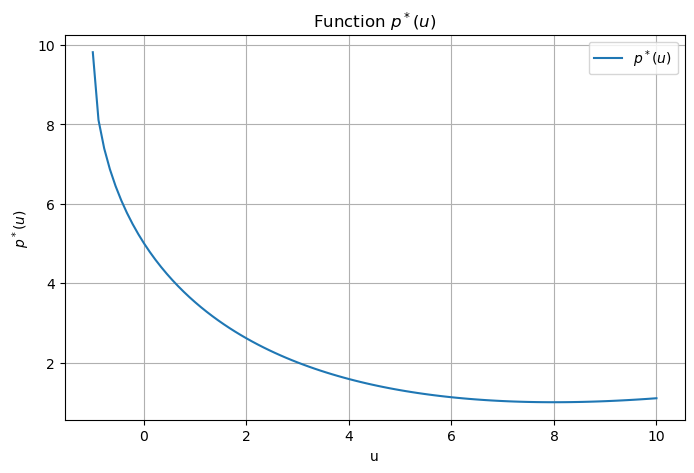

In [5]:
def pstar(u):
    return 11 + u - 6 * np.sqrt(1 + u)

u = np.linspace(-.999, 10, 100)
plt.figure(figsize=(8, 5))
plt.plot(u, pstar(u), label='$p^*(u)$')
plt.xlabel('u')
plt.ylabel('$p^*(u)$')
plt.title('Function $p^*(u)$')
plt.legend()
plt.grid(True)
plt.show()

To find the derivative at $u = 0$, we will take the derivative of $p^*(u)$ with respect to $u$. We have that
$\begin{align}
\frac{dp^*(u)}{du} & = 1 - \frac{3}{\sqrt{1 + u}}
\end{align}$
Putting in $u = 0$, we have that
$\begin{align}
\frac{dp^*(0)}{du} & = 1 - \frac{3}{\sqrt{1}} \\
& = 1 - 3 \\
& = -2
\end{align}$
Which is exactly $-\lambda^*$ from above. $\blacksquare$

## Problem 2
### A
We will proceed with the hint. We will show that $\inf_{y \in \mathbb{R}^m} \left\{\max_{i \in m} y_i - \lambda^T y\right\} = \begin{cases} 0 & \lambda \geq 0, \sum_{i = 1}^m \lambda_i = 1 \\ -\infty & \text{otherwise} \end{cases}$. 

First, it should be clear that if $\lambda < 0$ then the problem is unbounded below. Therefore, we will consider the case where $\lambda \geq 0$. First, if $\sum_{i = 1}^m \lambda_i \neq 1$, then we can just take $y = 0$ and we have that the problem is unbounded below. Therefore, we will consider the case where $\sum_{i = 1}^m \lambda_i = 1$. If $\lambda \geq 0$ and $\sum_{i = 1}^m \lambda_i = 1$, then we have that the problem is feasible. We will show that the minimum is $0$. 

First, we will show that the minimum is less than or equal to $0$. We have that
$\begin{align}
\max_{i \in m} y_i - \lambda^T y & \leq \max_{i \in m} y_i - \lambda^T y + \lambda^T y \\
& = \max_{i \in m} y_i \\
& \leq 0
\end{align}$

Now, we will show that the minimum is greater than or equal to $0$. We have that
$\begin{align}
\max_{i \in m} y_i - \lambda^T y & \geq \max_{i \in m} y_i - \lambda^T y - \lambda^T y \\
& = \max_{i \in m} y_i - 2\lambda^T y \\
& \geq 0
\end{align}$

Therefore, we have that the minimum is $0$.

Now, to solve Part A as given. We want to derive the dual problem of 
$\begin{align}
\text{minimize } \:\:\: & \:\:\: \max_{i \in m} y_i \\
\text{subject to } & \:\:\: a_i^T x + b_i = y_i, \:\:\: i \in m
\end{align}$

We can first write down the dual function. The Lagrange dual is given by
$\begin{align}
L(y, \lambda) & = \max_{i \in m} y_i - \lambda^T y + \sum_{i = 1}^m \lambda_i(a_i^T x + b_i - y_i) \\
\end{align}$
And of course we want to minimize the above. So we have that 
$\begin{align}
g(\lambda) & = \min_{y} L(y, \lambda) \\
g(\lambda) & = \inf_{y, x}\left(\max_{i \in m} y_i - \lambda^T y + \sum_{i = 1}^m \lambda_i(a_i^T x + b_i - y_i)\right)
\end{align}$

We will now use the hint to solve the above. We have that
$\begin{align}
g(\lambda) & \begin{cases} b^T \lambda & \text{if } \lambda \geq 0, \sum_{i = 1}^m \lambda_i = 1, \sum_{i = 1}^m \lambda_i a_i = 0 \\
-\infty & \text{otherwise} \end{cases}
\end{align}$
And the dual problem is
$\begin{align}
\text{maximize } \:\:\: & \:\:\: b^T \lambda \\
\text{subject to } & \:\:\: \lambda \preceq 0, \sum_{i = 1}^m \lambda_i = 1, A^t\lambda = 0
\end{align}$


### B
We will now rewrite the problem as an LP problem. Note that we want to minimize $\max_{i \in m} y_i$. We can rewrite this as
$\begin{align}
\text{minimize } \:\:\: & \:\:\: t \\
\text{subject to } & \:\:\: y_i - t \leq 0, \:\:\: i \in m
\end{align}$
Which can also be expressed as 
$\begin{align}
\text{minimize } \:\:\: & \:\:\: t \\
\text{subject to } & \:\:\: Ax + b \preceq t
\end{align}$

We will now write out the dual problem. The Lagrange dual is given by
$\begin{align}
L(x, \lambda) & = t - \sum_{i = 1}^m \lambda_i(y_i - t) + \lambda^T(Ax + b - t)
\end{align}$
And of course we want to maximize the above. So we have that
$\begin{align}
\text{maximize} \:\:\: & \:\:\: b^Tz \\
\text{subject to} & \:\:\: A^Tz = 0, \:\:\: z \succeq 0, \:\:\: \sum_{i = 1}^m z_i = 1
\end{align}$
Notice that this is the same as the dual problem we derived in Part A.

### C
As the problem gives tell us, we will let $p^*_{pwl}$ and $p^*_{gp}$ be the optimal values of 5.105 and 5.106, respectively. We will show that $0 \leq p^*_{gp} - p^*_{pwl} \leq \log m$. 

We are going to have to first suppose that $z^*$ is the optimal solution to the dual problem of 5.62. Recall that this means that 
$\begin{align}
\text{maximize} \:\:\: & \:\:\: b^Tz  - \sum_{i = 1}^m z_i \log z_i \\
\text{subject to} & \:\:\: A^Tz = 0, \:\:\: z \succeq 0, \:\:\: \sum_{i = 1}^m z_i = 1
\end{align}$

Now, if that is true, then it also must be the that $z^*$ is at least a feasible solution to the dual problem of 5.105. That is, we can say that 
$\begin{align}
b^Tz & = p^*_{gp}  + \sum_{i = 1}^m z^*_i \log z^*_i
\end{align}$
Of course, since $z^*$ is feasible for the dual problem of 5.105, we know that it must be a lower bound on 5.106 too. This is because the dual problem of 5.106 is a maximization problem and thus the dual problem of 5.105 is a lower bound on it. Therefore, we have that
$\begin{align}
p^*_{pwl} & \geq p^*_{gp} + \sum_{i = 1}^m z^*_i \log z^*_i 
\end{align}$

Now, we can also establish a lower bound. Clearly since $\sum_{i = 1}^m z_i = 1$, this means that  $\min \sum_{i = 1}^m z_i \log z_i = -\log(m)$. Therefore, we have that
$\begin{align}
p^*_{pwl} & \leq p^*_{gp} + \sum_{i = 1}^m z^*_i \log z^*_i \geq p^*_{gp} - \log(m)
\end{align}$
Now, the last thing we need to note is that $p^*_{gp} \geq p^*_{pwl}$. This is because the dual problem of 5.106 is a maximization problem and thus the dual problem of 5.105 is a lower bound on it. Therefore, we have that
$\begin{align}
p^*_{pwl} \leq p^*_{gp} \leq \log m \\
\implies 0 \leq p^*_{gp} - p^*_{pwl} \leq \log m
\end{align}$


### D
Note that this new problem is 
$\begin{align}
\text{minimize } \:\:\: & \:\:\: \frac{1}{\gamma} \log\left(\sum_{i = 1}^m \exp{\left(\gamma y_i\right)}\right) \\
\text{subject to } \:\:\: & \:\:\: Ax + b = y
\end{align}$

The Lagrangian is 
$\begin{align}
L(x, y, \lambda) & = \frac{1}{\gamma} \log\left(\sum_{i = 1}^m \exp{\left(\gamma y_i\right)}\right) + \lambda^T(Ax + b - y)
\end{align}$
If we start minimizing with respect to $x$, we can see that the problem will be unbounded below if $A^T\lambda \neq 0$. This is because the problem will be unbounded below if $\inf_x \left(\lambda^T(Ax + b - y)\right) = -\infty$. Therefore, we will consider the case where $A^T\lambda = 0$.

We will now minimize with respect to $y$. We will take the gradient and set it equal to zero. We have that
$\begin{align}
\frac{dL(x, y, \lambda)}{dy} & = \frac{\exp{\left(\gamma y_i\right)}}{\sum_{i = 1}^m \exp{\left(\gamma y_i\right)}} - \lambda_i = 0
\end{align}$
Solving for $y_i$, we have that
$\begin{align}
\frac{\exp{\left(\gamma y_i\right)}}{\sum_{i = 1}^m \exp{\left(\gamma y_i\right)}} & = \lambda_i
\end{align}$
Now, this problem is only solvable under specific conditions. Namely, $\sum_{i = 1}^m \lambda = 1$ and $\lambda \preceq 0$. If these conditions are met, then we can solve for $y_i$. The dual function will be given by 
$\begin{align}
g(z) & = b^T\lambda - \frac{1}{\gamma}\sum_{i = 1}^m \lambda_i \log \lambda_i
\end{align}$
And the dual problem will be given by
$\begin{align}
\text{maximize} \:\:\: & \:\:\: b^T\lambda - \frac{1}{\gamma}\sum_{i = 1}^m \lambda_i \log \lambda_i \\
\text{subject to} & \:\:\: A^T\lambda = 0, \:\:\: \lambda \succeq 0, \:\:\: \sum_{i = 1}^m \lambda_i = 1
\end{align}$
Note this is the exact same as the dual problem as given in Part C. Therefore, by Part C we can conclude that 
$\begin{align}
p^*_{pg}(\gamma) - \frac{1}{\gamma} \log(m) \leq p^*_{pwl} \leq p^*_{pg}(\gamma)
\end{align}$
$\blacksquare$

## Problem 3

Note that we can use that the dual norm of $\vert\vert \cdot \vert\vert_2$ is $\vert\vert \cdot \vert\vert_2$. As the problem says, we will introduce an equality constraint that $y_i  = A_i \cdot x + b_i$. We will then write out the Lagrangian as
$\begin{align}
L(x, \lambda) & = \frac{1}{2}\vert\vert x - x_0 \vert\vert_2^2 + \sum_{i = 1}^N \lambda_i(y_i - A_i \cdot x - b_i) + \sum_{i = 1}^N \vert\vert y_i\vert\vert_2
\end{align}$
We will first minimize the Lagrangian with respect to $y_i$. We have that we want to find
$\begin{align}
\inf_{y_i} \left(\vert\vert y_i \vert\vert_2 + z_i^Ty_i\right)
\end{align}$
Notice that if $\vert\vert z_i \vert\vert_2 > 1$, then the problem is unbounded below. This is because we can just take $y_i = -a z_i$ and then take the limit as $a \to \infty$. In that case, then we can see that
$\begin{align}
\inf \lim_{t \to \infty} \left(\vert\vert -a z_i \vert\vert_2 + z_i^T(-a z_i)\right) & = \inf \lim_{t \to \infty} \left(a \vert\vert z_i \vert\vert_2 - a^2 \vert\vert z_i \vert\vert_2^2\right) \\
& = \inf \lim_{t \to \infty} \left(a \vert\vert z_i \vert\vert_2(1 - a \vert\vert z_i \vert\vert_2)\right) \\
& = -\infty
\end{align}$
Therefore, we will consider the case where $\vert\vert z_i \vert\vert_2 \leq 1$. Now, if $\vert\vert z_i \vert\vert_2 \leq 1$, then we can apply the Cauchy-Schwarz inequality to see that
$\begin{align}
\inf_{y_i} \left(\vert\vert y_i \vert\vert_2 + z_i^Ty_i\right) & = \inf_{y_i} \left(\vert\vert y_i \vert\vert_2 + z_i^Ty_i\right) \\
& = \inf_{y_i} \left(\vert\vert y_i \vert\vert_2 + \vert\vert z_i \vert\vert_2 \vert\vert y_i \vert\vert_2\right) \\
& \geq \inf_{y_i} \left((1 + \vert\vert z_i \vert\vert_2)\vert\vert y_i \vert\vert_2\right) \\
& \geq 0
\end{align}$

Notice that we can obtain $0$ if $y_i = 0$. Therefore, we have that
$\begin{align}
\inf_{y_i} \left(\vert\vert y_i \vert\vert_2 + z_i^Ty_i\right) & = \begin{cases}
0 & \text{if } \vert\vert z_i \vert\vert_2 \leq 1 \\
-\infty & \text{if } \vert\vert z_i \vert\vert_2 > 1
\end{cases}
\end{align}$

We will now minimize the Lagrangian with respect to $x$. We have that we want to find the gradient of the Lagrangian with respect to $x$. We have that
$\begin{align}
\nabla_x L(x, \lambda) & = x - x_0 - \sum_{i = 1}^N \lambda_i A_i^T
\end{align}$
Setting this equal to zero, we have that
$\begin{align}
0 & = x - x_0 - \sum_{i = 1}^N \lambda_i A_i^T \\
\implies x & = x_0 + \sum_{i = 1}^N \lambda_i A_i^T
\end{align}$
Now, we can plug this into the Lagrangian to get
$\begin{align}
g(z) & = \begin{cases}
\sum_{i = 1}^N (A_ix_0 + b_i)^T z_i - \frac{1}{2}\vert\vert \sum_{i = 1}^N A_i^T z_i \vert\vert_2^2 & \text{if } \vert\vert z_i \vert\vert_2 \leq 1 \\
-\infty & \text{if } \vert\vert z_i \vert\vert_2 > 1
\end{cases}
\end{align}$
And so our dual problem is 
$\begin{align}
\text{maximize} \:\:\: & \:\:\: \sum_{i = 1}^N (A_ix_0 + b_i)^T z_i - \frac{1}{2}\vert\vert \sum_{i = 1}^N A_i^T z_i \vert\vert_2^2 \\
\text{subject to} & \:\:\: \vert\vert z_i \vert\vert_2 \leq 1
\end{align}$
And so we are done. $\blacksquare$


## Problem 4

We will write out the problems for clarity. Let $f$ and $h$ be convex functions. Then, we will consider two problems. The first is 
$\begin{align}
\text{minimize} \:\:\: & \:\:\: f(x) \\
\text{subject to} & \:\:\: h(x) \leq t
\end{align}$
such that $t$ is some parameter. The second problem is
$\begin{align}
\text{minimize} \:\:\: & \:\:\: f(x) + \lambda \cdot h(x) \\
\end{align}$
where $\lambda$ is some parameter. We will show that the two problems are equivalent. As suggested by the problem, we will let $\{p^*_t, x^*_t\}$ and $\{p^*_\lambda, x^*_\lambda\}$ be the optimal values and solutions to the first and second problems, respectively. We will show that $p^*_t = p^*_\lambda$ and $x^*_t = x^*_\lambda$.

### Part A
We will show that $\forall t \in \mathbb{R}$, if $Con_t$ is feasible then there is a $\lambda \geq  0$ such that $x^*_t$ is also an optimal solution for $Reg_\lambda$.

Thus, let $t \in \mathbb{R}$ and suppose that $Con_t$ is feasible. Then, if we let $x^*_t$ be the optimal solution to $Con_t$, we know that $f(x^*_t) \leq f(x)$ for all $x$ such that $h(x) \leq t$ and that $h(x^*) \leq t$. As usual for this PSET, we will use the Lagrange Dual to solve this problem. We will convert the constrained problem to the Lagrange Dual:
$\begin{align}
L(x, \lambda) & = f(x) + \lambda \cdot (h(x) - t)
\end{align}$
The dual function is then given by
$\begin{align}
g(\lambda) & = \inf_{x} L(x, \lambda) \\
& = \inf_{x} f(x) + \lambda \cdot (h(x) - t)
\end{align}$
And the dual problem is just the max:
$\begin{align}
\text{maximize} \:\:\: & \:\:\: g(\lambda) \\
\text{subject to} & \:\:\: \lambda \geq 0
\end{align}$

Let us say that $\lambda^*$ is the optimal solution to the dual problem. Then, we have that $p^*_t = g(\lambda^*)$. We will now show that $x^*_t$ is also an optimal solution to the regularized problem. We have that
$\begin{align}
p^*_t & = g(\lambda^*) \\
& = \inf_{x} f(x) + \lambda^* \cdot (h(x) - t) \\
& \leq f(x^*_t) + \lambda^* \cdot (h(x^*_t) - t) \\
& \leq p^*_t \\
\implies p^*_t & = f(x^*_t) + \lambda^* \cdot (h(x^*_t) - t)
\end{align}$

Therefore, we have that 
$\begin{align}
\inf_{x} f(x) + \lambda^* \cdot (h(x) - t) & = f(x^*_t) + \lambda^* \cdot (h(x^*_t) - t) \\
\inf_{x} f(x) + \lambda^* \cdot h(x) & = f(x^*_t) + \lambda^* \cdot h(x^*_t) \\
\end{align}$

Therefore, we have that $x^*_t$ is also an optimal solution to the regularized problem. $\blacksquare$

### Part B
Now, let us assume that $Con_t$ is feasible but not strictly feasible. That is, $t = 0$. Moreover, we will assume the condition that 
$\begin{align}
\left\{x: h(x) \leq t \right\} \neq \phi, \:\:\: \left\{x: hg(x) < t\right\} = \phi \:\:\: \implies t = 0
\end{align}$

We will show that if $Con_t$ is feasible but not strictly feasible, then $x^*_t \in \arg \min h(x)$ such that $x^*_t$ is the optimal solution for $Reg_\lambda$ where $\lambda = + \infty$. 

To proceed, we will first show that $x^*_t \in \arg \min h(x)$. We know that $Con_t$ is feasible but not strictly feasible. Therefore, we have that $t = 0$. Moreover, we have that 
$\begin{align}
h(x^*_t) & \leq 0
\end{align}$
Let's assume that $x_t^*$ is not the $\arg \min h(x)$. Then, there exists some $x'$ such that $h(x') < h(x^*_t)$. But then we have that
$\begin{align}
h(x') & < h(x^*_t) \\
\implies h(x') - h(x^*_t) & < 0 \\
\implies \lambda \cdot (h(x') - h(x^*_t)) & < 0 \\
\implies \lambda \cdot h(x') - \lambda \cdot h(x^*_t) & < 0 \\
\implies f(x') + \lambda \cdot h(x') - f(x^*_t) - \lambda \cdot h(x^*_t) & < 0 \\
\implies f(x') + \lambda \cdot h(x') & < f(x^*_t) + \lambda \cdot h(x^*_t) \\
\implies f(x') - f(x^*_t) < \lambda \cdot (h(x^*_t) - h(x')) \\
\end{align}$
Now, right hand side is greater than or equal to zero. Therefore, we have that $f(x') - f(x^*_t) < 0$. But this contradicts the fact that $x^*_t$ is the optimal solution to $Con_t$. Therefore, we have that $x^*_t \in \arg \min h(x)$.

To show the second bit, we will show that $x^*_t$ is the optimal solution for $Reg_\lambda$ and that $\lambda = + \infty$. Since we know that $x^*_t \in \arg \min h(x)$, we have that
$\begin{align}
f(x^*_t) + \lambda \cdot h(x^*_t) & = \inf_{x} f(x) + \lambda \cdot h(x) \\
\end{align}$
This must be the case since $x_t^*$ is the optimal solution to $Con_t$, and thus is also the $\min f(x)$. Therefore, we have that $x^*_t$ is the optimal solution for $Reg_\lambda$. To show that $\lambda = + \infty$, consider that if $\lambda < + \infty$, then that means that $\lambda = M$ for some $M \in \mathbb{R}$. But then we have that since $h(x^*_t) \leq 0$, 
$\begin{align}
f(x^*_t) + M \cdot h(x^*_t) > f(x^*_t) + (M + 1) \cdot h(x^*_t)
\end{align}$

Therefore, it must be the case that $\lambda = + \infty$. $\blacksquare$

## Problem 5

In [6]:
def generate_linear_data(n, d, sigma):
    """
    Generates linear data with noise.

    :param n: Number of data points
    :param d: Dimension of each data point
    :param sigma: Standard deviation of Gaussian noise
    :return: Tuple of (X, y) where X is the feature matrix and y is the target vector
    """
    # Randomly generate coefficients for the linear model (true coefficients)
    beta_true = np.ones(d,)

    # Generate feature matrix X
    X = np.random.randn(n, d)

    # Generate target values with noise
    y = X.dot(beta_true) + sigma * np.random.randn(n)

    return X, y, beta_true

# Example usage
n = 100  # Number of data points
d = 20    # Dimension of each data point
sigma = 0  # Noise level

X, y, beta_true = generate_linear_data(n, d, sigma)

### Build the LAD loss and its smoothed approximation

In [7]:

# Define linear network
class LinearModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1, bias=False)
        nn.init.constant_(self.linear.weight, 0.0)

    def forward(self, x):
        return self.linear(x)


# LAD loss
def lad_loss(y_pred, y_true):
    return torch.sum(torch.abs(y_pred - y_true))

# Smoothed LAD loss
def smoothed_lad_loss(y_pred, y_true, gamma):
    diff = y_pred - y_true
    return torch.sum(torch.log(torch.exp(gamma * diff) + torch.exp(-gamma * diff)) / gamma)



In [8]:
# Learning parameters
lr = 0.001  # learning rate
num_iter = 200  # number of iterations

gamma_values = [1, 2, 3, 4,5, 6]
# Set trackers for losses
losses = {gamma: [] for gamma in gamma_values}
losses['nonsmooth'] = []
betas = {gamma: None for gamma in gamma_values}
betas['nonsmooth'] = None

# save the lossses of each function.
# losses[1] is the losses of the smoothed lad loss with $\gamma = 1$.
# save the last iterate into betas
print(losses, betas)

{1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 'nonsmooth': []} {1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 'nonsmooth': None}


### Now write down the code that implements GD for these objective functions. Set $\alpha = 0.001$ and $T = 200$, initialize from zero vector.

In [9]:
def train_model(X, y, input_dim, gamma_values, lr=0.001, num_iter=200):
    # Convert X and y to PyTorch tensors
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Ensure y is a column vector

    models = {gamma: LinearModel(input_dim) for gamma in gamma_values}
    models['nonsmooth'] = LinearModel(input_dim)
    
    for gamma, model in models.items():

        model.linear.weight.data.fill_(0.0)

        for t in range(num_iter):
            if gamma == 'nonsmooth':
                loss = lad_loss(model(X_tensor), y_tensor)
            else:
                loss = smoothed_lad_loss(model(X_tensor), y_tensor, gamma)

            loss.backward()

            # Update weights using gradient descent
            with torch.no_grad():
                model.linear.weight -= lr * model.linear.weight.grad

            model.linear.weight.grad.zero_()

            losses[gamma].append(loss.item())
            betas[gamma] = model.linear.weight.data.numpy()

    return models, losses, betas

n, d, sigma = 100, 20, 0.1  
X, y, beta_true = generate_linear_data(n, d, sigma)
gamma_values = [1, 2, 3, 4, 5, 6]  # Gamma values for smoothed LAD loss

# Train the model
models, losses, betas = train_model(X, y, d, gamma_values)


Beta estimation error for gamma=1: 0.05703627419968643
Beta estimation error for gamma=2: 0.059238641822355234
Beta estimation error for gamma=3: 0.059137565133192356
Beta estimation error for gamma=4: 0.05899397144939793
Beta estimation error for gamma=5: 0.058852307478548686
Beta estimation error for gamma=6: 0.05873055778324109
Beta estimation error for Nonsmooth LAD: 0.07338881078595158


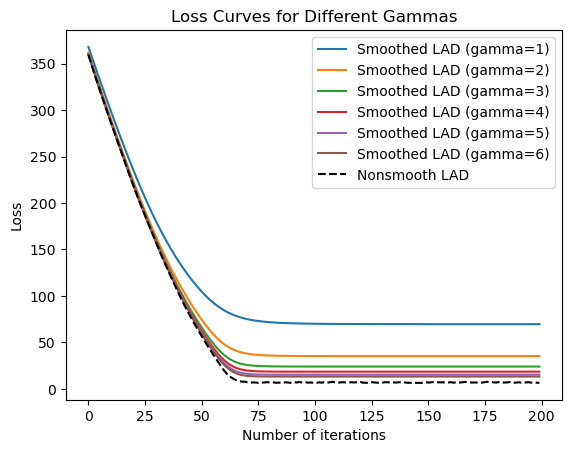

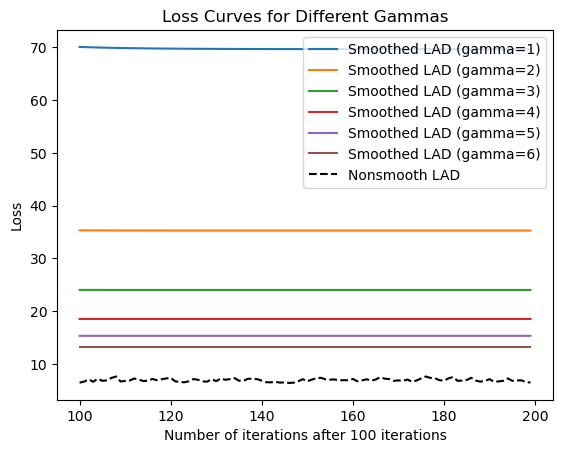

In [10]:
for gamma in gamma_values:
    print(f"Beta estimation error for gamma={gamma}:", np.linalg.norm(betas[gamma] - beta_true))
print("Beta estimation error for Nonsmooth LAD:", np.linalg.norm(betas['nonsmooth'] - beta_true))

# Plotting the loss curves
for gamma in gamma_values:
    plt.plot(losses[gamma][0:200], label=f'Smoothed LAD (gamma={gamma})')
plt.plot(losses['nonsmooth'][0:200], label='Nonsmooth LAD', color='k', linestyle='--')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss Curves for Different Gammas')
plt.legend()
plt.show()


# Plotting the loss curves
for gamma in gamma_values:
    plt.plot(np.arange(100)+100, losses[gamma][100:200], label=f'Smoothed LAD (gamma={gamma})')
plt.plot(np.arange(100)+100, losses['nonsmooth'][100:200], label='Nonsmooth LAD', color='k', linestyle='--')
plt.xlabel('Number of iterations after 100 iterations')
plt.ylabel('Loss')
plt.title('Loss Curves for Different Gammas')
plt.legend()
plt.show()

## Problem 6

### Support Vector Machine -- Primal and Dual Formulations

#### In this Problem, you will implement dual formulation of SVM

![SVM, see https://en.wikipedia.org/wiki/Support_vector_machine](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/512px-SVM_margin.png)

### SVM

SVMs are a powerful supervised machine learning algorithm for classification and regression tasks. They are particularly well-suited for handling high-dimensional data and have proven effective in a wide range of applications, including text classification, image recognition, bioinformatics, and more.

### Mathematical Formulation

SVMs aim to find a hyperplane that best separates two classes in a dataset, while maximizing the margin between them. The hyperplane is defined by a weight vector $w$ and a bias term $b$.


#### Hard-margin SVM

**Optimization**: given data $((x_i,y_i))_{i=1}^n$:
$\begin{align}
\min_{w, b } \quad & \frac{1}{2} \|w\|^2  \notag   \\
\text{subject to} \quad & y_i \cdot (w^\top  x_i + b) \geq 1  , \quad i = 1, \ldots, n.  
\end{align}$


This only works for linearly seperable data! That is, this problem has a solution if we can find a hyperplane that **perfectly separates data**.


#### Soft-Margin SVM
The soft margin SVM introduces slack variables to allow for some misclassifications, making it more robust to noise and outliers. The optimization problem for the soft margin SVM can be written as  
$\begin{equation}
\begin{aligned}
\min_{w, b, \zeta} \quad & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n \zeta_i \\
\text{subject to} \quad & y_i (w^T x_i + b) \geq 1 - \zeta_i, \quad i = 1, \ldots, n, \\
& \zeta_i \geq 0, \quad i = 1, \ldots, n.
\end{aligned}
\end{equation}$




### Dual SVMs

#### Hard-Margin Dual SVM
$
\begin{equation}
\begin{aligned}
\max_{\alpha} \quad & \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j \\
\text{subject to} \quad & \sum_{i=1}^n \alpha_i y_i = 0, \\
& \alpha_i \geq 0, \quad i = 1, \ldots, n.
\end{aligned}
\end{equation}
$
#### Soft-Margin Dual SVM
$
\begin{equation}
\begin{aligned}
\max_{\alpha} \quad & \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j \\
\text{subject to} \quad & \sum_{i=1}^n \alpha_i y_i = 0, \\
& 0 \leq \alpha_i \leq C, \quad i = 1, \ldots, n.
\end{aligned}
\end{equation}
$


In [11]:
## Define function that plots data points

def get_line(W, b, x):
    return (-W[0]*x+b)/W[1]

def plot_binary(X, Y, W=None, b=None):
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    x1 = np.arange(x1_min, x1_max, .02)
    xx1, xx2 = np.meshgrid(x1, np.arange(x2_min, x2_max, .02))
    if W is not None and b is not None:
        decision = np.c_[xx1.ravel(), xx2.ravel()] @ W + b
        plt.contourf(xx1, xx2, decision.reshape(xx1.shape), cmap=plt.cm.RdBu, alpha=.8)
        plt.colorbar()
        for intercept in [-1,0,1]:
            plt.plot(x1, get_line(W, b + intercept, x1), c='black')
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:,0],X[:,1], c=Y.ravel(), cmap=cm_bright)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()




def plot_binary_with_model(X, Y, model, threshold=0):
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    x1 = np.arange(x1_min, x1_max, .02)
    xx1, xx2 = np.meshgrid(x1, np.arange(x2_min, x2_max, .02))

    # Use the model to make predictions
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    decision_values = model(grid_tensor).detach().numpy()

    decision_binary = np.sign(decision_values - threshold)
    # Plot the decision boundary
    plt.contourf(xx1, xx2, decision_binary.reshape(xx1.shape), cmap=plt.cm.RdBu, alpha=.8)
    plt.colorbar()

    # Plot the data points
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:,0], X[:,1], c=Y.ravel(), cmap=cm_bright)

    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

### Generate Data

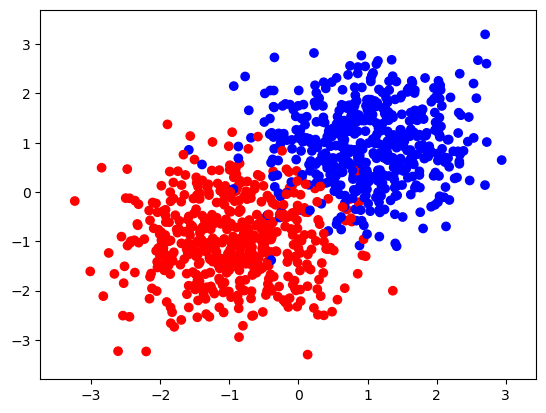

In [12]:
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples=1000, centers=[(-1, -1), (1, 1)], cluster_std=0.8)
Y[Y == 0] = -1 # to have +/- 1 labels


plot_binary(X, Y)

### Primal Soft Margin SVM

Optimal w: [1.86705378 1.6013651 ]
Optimal b: -0.056587344604652486


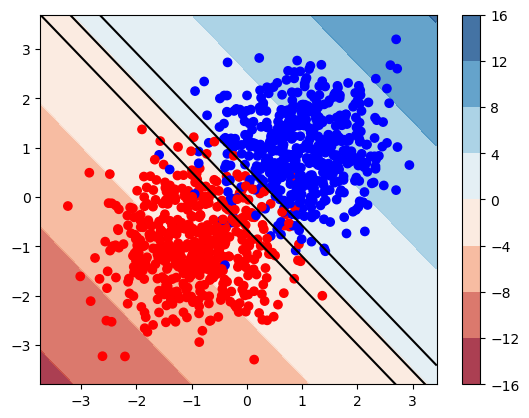

In [13]:
X = np.array(X)
Y = np.array(Y)

# Number of data points
n = X.shape[0]

# Create CVXPY variables for weights, bias, and slack variables
w = cp.Variable(X.shape[1])
b = cp.Variable()
zeta = cp.Variable(n)

# Set regularization parameter
C = 10.0  # You can adjust this value as needed

# Define the objective function
objective = cp.Minimize(cp.norm(w, 2) / 2 + C * cp.sum(zeta))

# Define the constraints
constraints = [
Y[i] * (cp.matmul(w, X[i]) + b) >= 1 - zeta[i] for i in range(n)
]
constraints += [zeta[i] >= 0 for i in range(n)]

# Create and solve the CVXPY problem
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.SCS, verbose=False)

# Extract the optimal values of w and b
w_opt = w.value
b_opt = b.value

print("Optimal w:", w_opt)
print("Optimal b:", b_opt)

# pytorch
plot_binary(X, Y, W=w_opt, b=b_opt)

### Now you are going to write the code for dual soft-margin SVM

In particular, let $K \in \mathbb{R}^{n\times n}$ be a matrix given by
$$
K_{i,j} = y_i \cdot y_j \cdot x_i x_j^\top + \epsilon \cdot I\{ i = j\}
$$
with $\epsilon = 1e-7$.
The objective function becomes
$$ \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j K_{i,j} = \sum_{i=1}^n \alpha_i - 1/2 \cdot \alpha^\top K \alpha  $$

Optimal w (from dual): [9618.52157567 9619.61387728]
Optimal b (from dual): -0.0027261703171897154


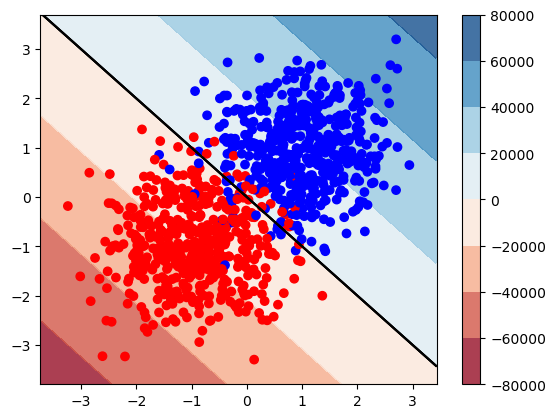

In [14]:
X = np.array(X)  # Assuming X is your feature matrix
Y = np.array(Y)  # Assuming Y is your label vector with {-1, 1} values

# Number of data points
n = X.shape[0]

# Create kernel matrix
K = np.outer(Y, Y) * (X @ X.T) +  1e-7 * np.eye(n)

# Create CVXPY variable for the Lagrange multipliers
alpha = cp.Variable(n)

# Define the dual objective
dual_objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, np.multiply.outer(Y, Y) * K))

# Define the dual constraints
dual_constraints = [alpha >= 0, alpha <= C, cp.sum(cp.multiply(alpha, Y)) == 0]

# Create and solve the CVXPY problem
dual_prob = cp.Problem(dual_objective, dual_constraints)
dual_prob.solve(solver=cp.SCS, verbose=False)

# Extract the optimal values of alpha
alpha_opt = alpha.value

# Computing the optimal w and b from alpha
w_dual_opt = np.sum((alpha_opt * Y).reshape(-1, 1) * X, axis=0)
cond = (alpha_opt > 1e-4)  # Small threshold to identify support vectors
b_dual_opt = np.mean(Y[cond] - np.dot(X[cond], w_opt))

print("Optimal w (from dual):", w_dual_opt)
print("Optimal b (from dual):", b_dual_opt)

plot_binary(X, Y, W=w_dual_opt, b=b_dual_opt)


### Nonlinear data and Kernel SVM

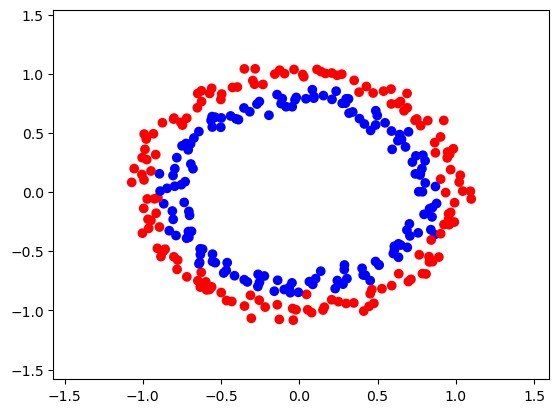

In [15]:
from sklearn.datasets import make_circles

X, Y = make_circles(n_samples=300, noise=0.05)
Y[Y == 0] = -1 #to have +/- 1 labels
plot_binary(X, Y)

Let's use the Radial kernel
\begin{equation}
k(x, x') = \exp\left(-\gamma \|x - x'\|^2\right).
\end{equation}
The matrix $K$ is given by  $K_{i,j} = y_i \cdot y_j \cdot k(x_i , x_j)  + \epsilon \cdot I\{ i = j\}$ with $\gamma = 100$. We set a large $\gamma$ because the decision rule basically is $y = 1$ if $\| x\|_2 \leq t$ for some $t$.

In [16]:
def rbf_kernel(x1, x2, gamma =0.5):
    """Compute the RBF kernel between two vectors."""
    return np.exp(-gamma * np.linalg.norm(x1 - x2)**2)

# Parameter
gamma = 100  # Adjust this parameter as needed

In [17]:
X = np.array(X)  # Assuming X is your feature matrix
Y = np.array(Y)  # Assuming Y is your label vector with {-1, 1} values

# Number of data points
n = X.shape[0]

C = 1
# Compute the RBF kernel matrix
K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = Y[i] * Y[j] * rbf_kernel(X[i], X[j], gamma)

# Add a small term for numerical stability
K += 1e-5 * np.eye(n)

# Check if K is positive semi-definite
if np.all(np.linalg.eigvals(K) >= 0):
    print("K is positive semi-definite")
else:
    print("K is not positive semi-definite")

K = cp.atoms.affine.wraps.psd_wrap(K) # tell cvxpy to skip checking that K is PD

# Create CVXPY variable for the Lagrange multipliers
alpha = cp.Variable(n)

# The dual problem objective
dual_objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, K))

# The dual problem constraints
dual_constraints = [0 <= alpha, alpha <= C, cp.sum(cp.multiply(alpha, Y)) == 0]

# Create and solve the CVXPY problem
dual_prob = cp.Problem(dual_objective, dual_constraints)

dual_prob.solve(solver=cp.SCS, verbose=True)

# Extract the optimal values of alpha
alpha_opt = alpha.value

K is positive semi-definite
                                     CVXPY                                     
                                     v1.4.2                                    
(CVXPY) Feb 14 10:03:20 PM: Your problem has 300 variables, 3 constraints, and 0 parameters.
(CVXPY) Feb 14 10:03:20 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 14 10:03:20 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 14 10:03:20 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Feb 14 10:03:20 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 14 10:03:20 PM: Compiling probl

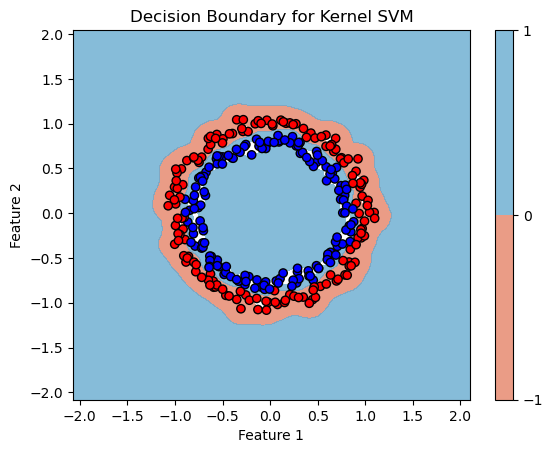

In [18]:

def calculate_bias(X, Y, alpha, gamma=0.5, C=5, tol=1e-5):

    support_vectors = (alpha > tol) & (alpha < C)
    b_values = []

    for i in range(len(alpha)):
        if support_vectors[i]:
            b_i = Y[i] - np.sum(alpha * Y * rbf_kernel(X[i], X[support_vectors], gamma))
            b_values.append(b_i)

    return np.mean(b_values)


def plot_kernel_svm(X, Y, alpha, b, gamma):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))

    # Grid of points to classify
    grid = np.c_[xx1.ravel(), xx2.ravel()]

    # Calculate the decision function for each point in the grid
    Z = np.zeros(grid.shape[0])
    for i in range(grid.shape[0]):
        for j in range(len(alpha)):
            Z[i] += alpha[j] * Y[j] * rbf_kernel(X[j], grid[i], gamma)
    Z += b
    Z = Z.reshape(xx1.shape)

    # Plot decision boundary
    plt.contourf(xx1, xx2, Z, levels=[-1, 0, 1], cmap=plt.cm.RdBu, alpha=0.8)
    plt.colorbar()

    # Plot data points
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright, edgecolors='k')

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary for Kernel SVM')
    plt.show()

# Calculate b after solving the dual SVM
b_opt = calculate_bias(X, Y, alpha_opt, gamma = 100, C = 1)
# Plot the decision boundary
plot_kernel_svm(X, Y, alpha_opt, b_opt, gamma = 100)